<a href="https://colab.research.google.com/github/Jaloliddin01/Data-Science-Learning/blob/main/simple_linear_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [12]:
df.district.value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [13]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [16]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [17]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

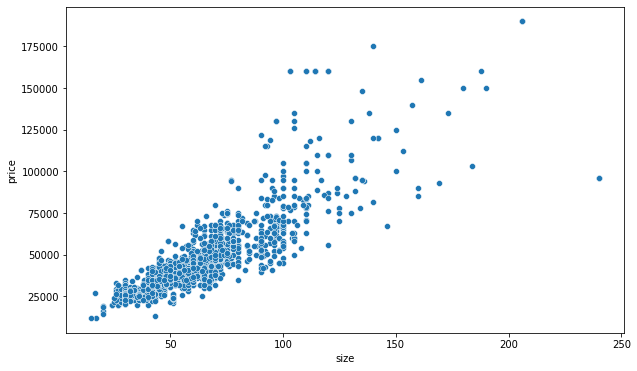

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

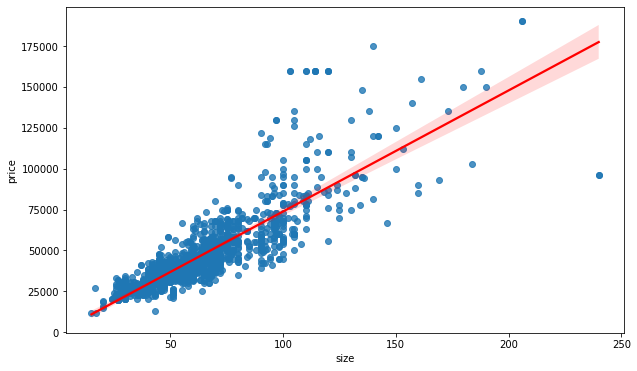

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [26]:
mean_x = np.average(X)
mean_y = np.average(y)

print(mean_x, mean_y) 

61.90783415841584 45617.487623762376


In [27]:
theta_1 = np.sum((X - mean_x)*(y - mean_y)) / np.sum((X - mean_x)*(X - mean_x))
theta_1

740.0264822713249

In [28]:
theta_0 = mean_y - theta_1 * mean_x
theta_0

-195.94911352666531

In [36]:
test_data = X.sample(500)
test_data

5020     72.0
3314     47.0
462      45.0
5520     70.0
3369     85.0
        ...  
4346     60.0
1125    105.0
183      42.0
489      42.0
967      27.0
Name: size, Length: 500, dtype: float64

In [37]:
test_label = y.loc[test_data.index]
test_label

5020    65000.0
3314    27000.0
462     26000.0
5520    46000.0
3369    47500.0
         ...   
4346    45000.0
1125    80000.0
183     25500.0
489     36800.0
967     19500.0
Name: price, Length: 500, dtype: float64

In [38]:
def get_prediction(size):
  return theta_0 + size * theta_1

In [39]:
predicted = test_data.apply(get_prediction)

In [40]:
differences_df = pd.DataFrame({'Forecasted price' : predicted, 'Real price' : test_label})
differences_df

,Forecasted price,Real price
5020,53085.957610,65000.0
3314,34585.295553,27000.0
462,33105.242589,26000.0
5520,51605.904645,46000.0
3369,62706.301880,47500.0
...,...,...
4346,44205.639823,45000.0
1125,77506.831525,80000.0
183,30885.163142,25500.0
489,30885.163142,36800.0


In [41]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(test_label, predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

12680.349017044384


In [42]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(test_label, predicted)
print(lin_mae)

7476.209972225604
